# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Executive Summary

**Goal**: Maximize revenue through efficient allocation of resources when selecting the sales approach.

**Findings**:

**Call Method:**
* 33% of customers reached

*  16.5% of revenue generated

* focusing on smaller transactions and 

* fostering long-term relationships

* shows a moderate level of site engagement

* limited efficiency due to high time requirement

*  **Just use for specific scenarios where personal customer interaction is necessary**

**mail Method:**

* 50% of customer reached

* 50% of revenue generated

* similar level of site engagement as "Call"

* higher item value and a broad reach

* highly effective and efficient

*  **Continue for wide variety of products and segements**

**Email + Call Method:**

*  17.15% of customers reached

* 33% of revenue generated

* highest average site visits

* focus on high-value transactions

* **Leverage for High-Value Sales**

**Performance-Measurement:**

* Keep track of cost and time consuming sales methods with the help of the "revenue-per-minute-call"-KPI.
* Increase from 1.73 to 7.23 in the span of 6 weeks
* **Track growth rates for future weeks**


# Data  Validation & Cleaning

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('product_sales.csv')

# Checking the data types
data_types = data.dtypes

# Checking for missing values
missing_values = data.isnull().sum()

shape=data.shape

data_types, missing_values,shape


(week                   int64
 sales_method          object
 customer_id           object
 nb_sold                int64
 revenue              float64
 years_as_customer      int64
 nb_site_visits         int64
 state                 object
 dtype: object,
 week                    0
 sales_method            0
 customer_id             0
 nb_sold                 0
 revenue              1074
 years_as_customer       0
 nb_site_visits          0
 state                   0
 dtype: int64,
 (15000, 8))

The dataset consists of **15,000 rows** and **8 columns**:

**week:** Numeric values representing the week of the sale. No missing values, same as the description. No cleaning is needed

**sales_method:** Several categories (e.g., Email, Call) without missing values, same as the description. Names are inconsistent with "Email" vs "email" and "Email + Call" vs "em + call". Names will be changed to a consistent approach.

**customer_id:** Unique identifiers without missing values, same as the description. No cleaning is needed.

**nb_sold:** Numeric values representing the number of products sold. No missing values, same as the description. No cleaning is needed

**revenue:** Numeric values with 1074 missing values. Based on a Chi-Square Test values are missing at random with "sales_method" and "week" having signifcant association. Cleaning will be done by imputing missing values with a linear regression.

**years_as_cus**tomer: Numeric values representing the number of years as a customer. No missing values, same as the description. No cleaning is needed.

**nb_site_visits:** Numeric values representing the number of site visits. No missing values, same as the description. No cleaning is needed.

**state:** Several categories representing the states where the sale occurred. No missing values, same as the description. No cleaning is needed.

Since no data was deleted in the cleaning process the dataset still consists of **15,000rows** and **8 columns** after cleaning.

In [18]:
# Values are missing at random based on Chi-Squared Test. With sales_method and week as significant factors.
# We will use these factors for predicting the missing values.

from sklearn.linear_model import LinearRegression

# Splitting the data into training and missing subsets
train_data = data.dropna(subset=['revenue'])
missing_data = data[data['revenue'].isnull()]

# Preparing the features and target variables
X_train = pd.get_dummies(train_data[['sales_method', 'week']], drop_first=True)
y_train = train_data['revenue']

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Preparing the features
X_na = pd.get_dummies(missing_data[['sales_method', 'week']], drop_first=True)

X_na = X_na[X_train.columns]

# Predicting the missing revenue values
predicted_revenue = model.predict(X_na)

# Replacing the missing revenue values with the predicted values
data.loc[missing_data.index, 'revenue'] = predicted_revenue

# Check if there are any more missing values in the revenue column
filled_data = data['revenue'].isnull().sum()
filled_data


0

In [19]:
# Replacing inconsistent wording in the sales_method column
data['sales_method'] = data['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'})


# Exploratory Data Analysis

## Number Customers Per Appraoch

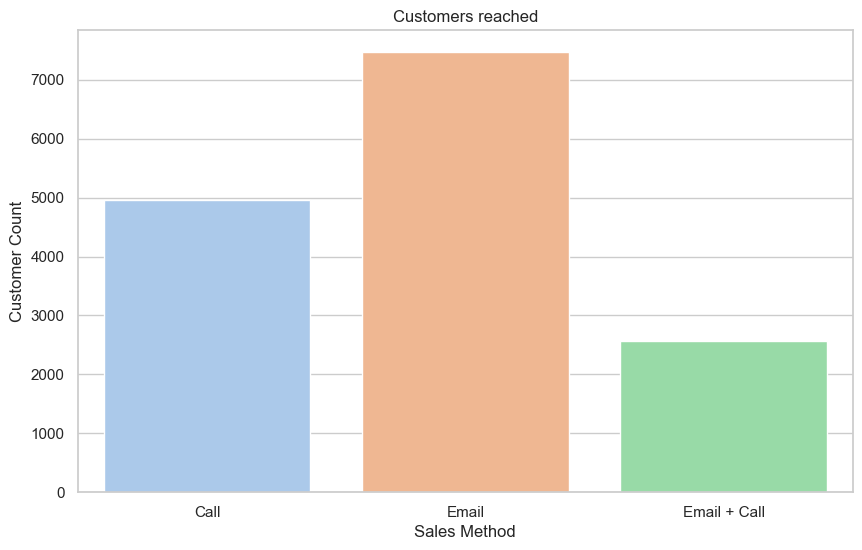

In [20]:

customer_counts = data.groupby('sales_method')['customer_id'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='customer_id', data=customer_counts, palette="pastel")

plt.xlabel('Sales Method')
plt.ylabel('Customer Count')
plt.title('Customers reached')

plt.show()


**33.08%** of our customers were reached via **Call**. 

**49.77%** were reached via **E-Mail**.

Only **17.15%** of our customers were reached via the hybrid approach of **E-Mail and Call**.

Taking into consideration the different efforts required for each of the methods we should strive for a high percentage in E-mail.


## Revenue DeepDive

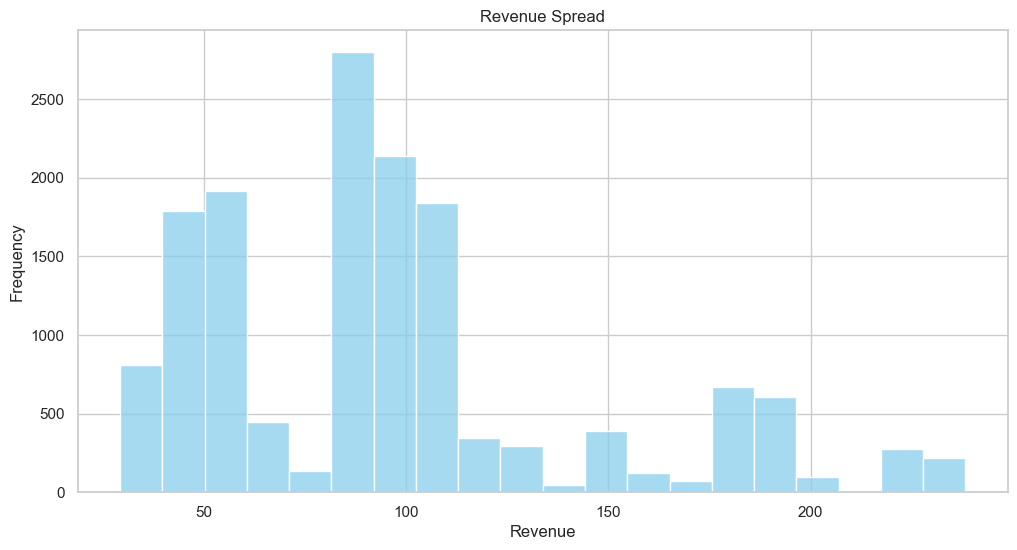

In [21]:
sns.set(style="whitegrid")

# Creating the histogram for the revenue column
plt.figure(figsize=(12, 6))
sns.histplot(data['revenue'], bins=20, color="skyblue")

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Spread')

# Displaying the plot
plt.show()


In [22]:
# Calculating the Average Number of Items
average_number_of_items = data['nb_sold'].mean()

# Calculating the Average Item Value
average_item_value = (data['revenue'] / data['nb_sold']).mean()


average_summary = {
    "Average Number of Items": average_number_of_items,
    "Average Item Value": average_item_value,
}

# Converting the average summary to a DataFrame so we can display it properly
average_summary_df = pd.DataFrame.from_dict(average_summary, orient='index', columns=['Value']).reset_index()
average_summary_df.rename(columns={'index': 'Metric'}, inplace=True)

average_summary_df.round(2)


,Metric,Value
0,Average Number of Items,10.08
1,Average Item Value,9.22


Revenue is Spread from 29  to 238 with most of the values below or slighty above 100. On Average 10 items were brought in each  transaction with a average item value of 9.22.

Since many items are brought with a low item value we could focus on increasing the numbers of items sold with additonal discounts or other sales methods. For methods including calls we can focus on upselling other products.

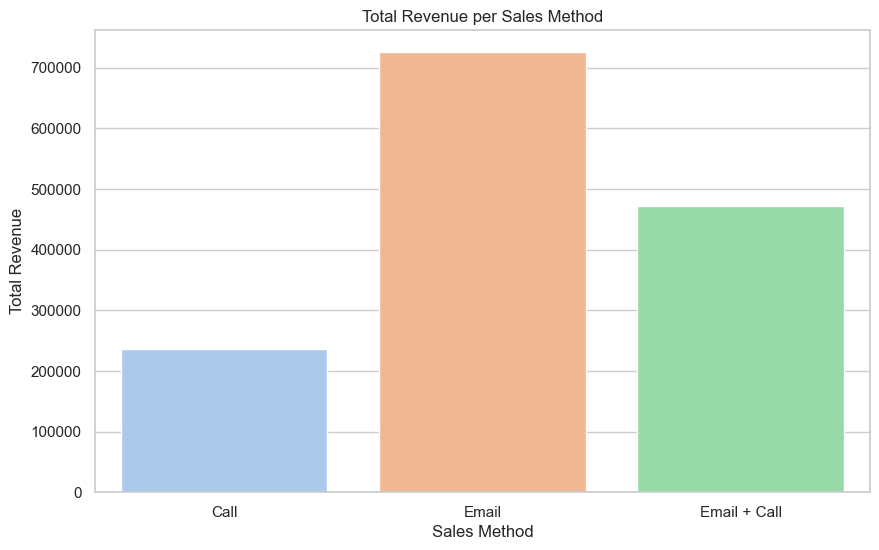

In [23]:
revenue_sum_per_method = data.groupby('sales_method')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='revenue', data=revenue_sum_per_method, palette="pastel")


plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Sales Method')

plt.show()


**16.5%** of our revenues ar coming from **Calls**. 

**50.50%** of our revenues ar coming from **E-Mail**.

**32.95%** of our revenues ar coming from the hybrid approach of **E-Mail and Call**.

Although just **17.15%** of our customers were reached with the hybrid approach, total revenues exceed the **calls** only method. Therefore the revenue for the **hybrid approach** must be slighty higher. Given the fact that we also reduce the manual calling effort from 30min per customer (**Call only**) to 10min per customer (**hybrid**), the **hybrid approach** is more effective in generating revenues (see boxplot below).

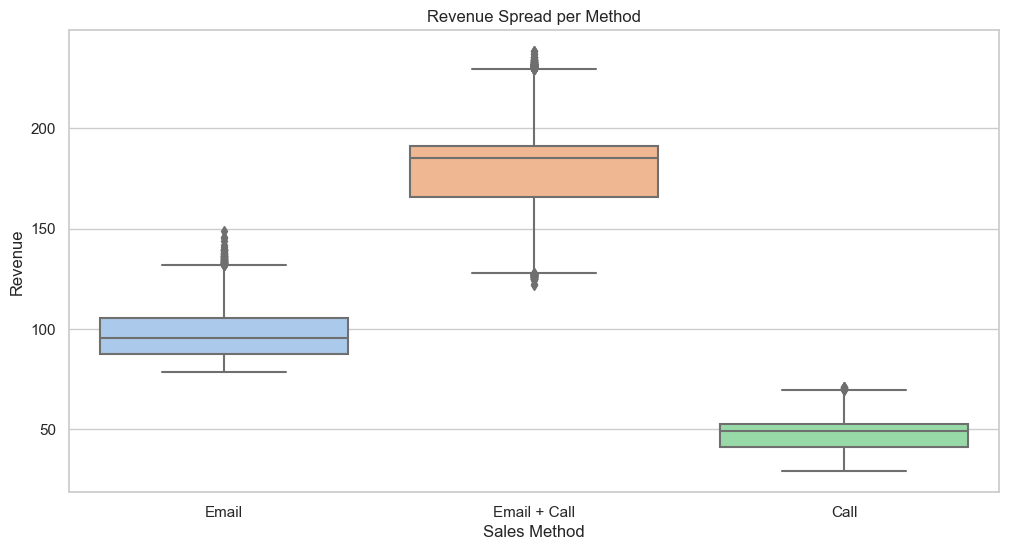

In [24]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='sales_method', y='revenue', data=data, palette="pastel")

plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Spread per Method')

plt.show()


The **call** method, although most time consuming, has the lowest revenues. **E-Mails** generate a moderate revenue but are the most time effective. 

The **hybrid approach** shows the highest revenue with the largest spread and outliers.

From a business perspective the higher revenues indicate an effective approach when mailing the customers first and then calling them after they had time to get to know the product. 
The higher spread indicates a more volatile approach, which could be based on the sales agent performance or personal consumer preferences.

## Approach Development since Launch

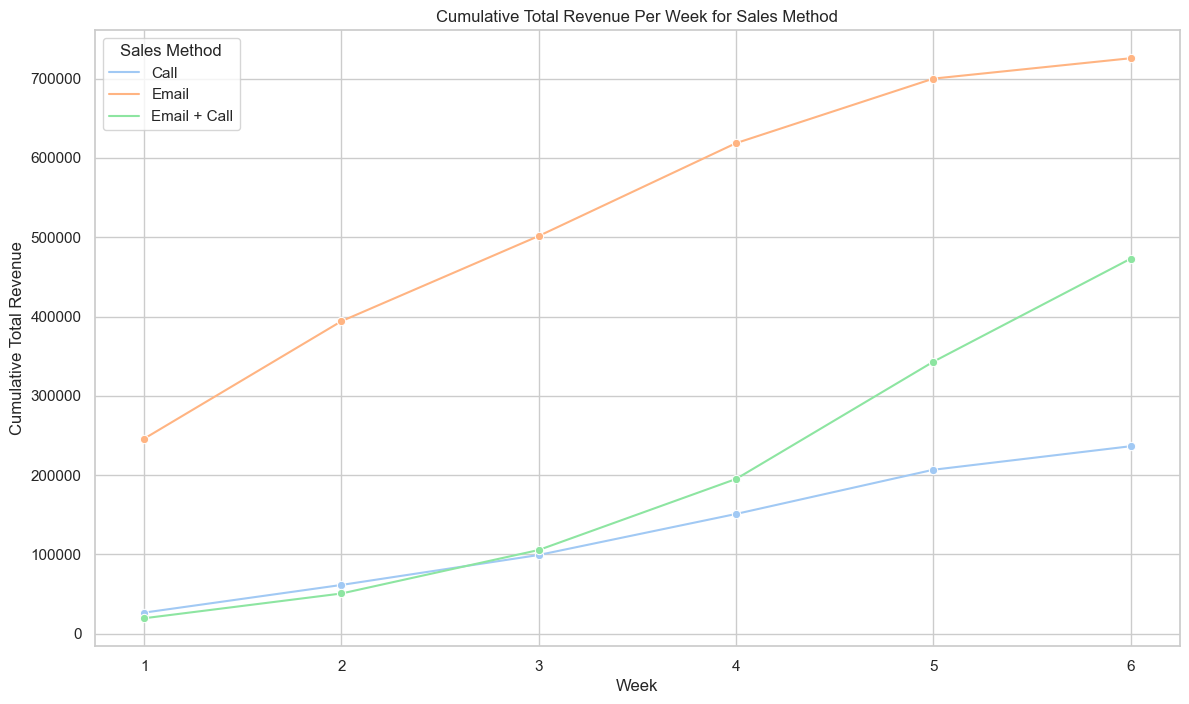

In [25]:
# Calculating the cumulative total revenue per week for each sales method
total_revenue_per_week_per_method = data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
total_revenue_per_week_per_method['cumulative_revenue'] = total_revenue_per_week_per_method.groupby('sales_method')['revenue'].cumsum()


#Plotting the cumulative total revenue per week for each sales method
plt.figure(figsize=(14, 8))
sns.lineplot(x='week', y='cumulative_revenue', hue='sales_method', data=total_revenue_per_week_per_method, palette='pastel', marker='o')
plt.title('Cumulative Total Revenue Per Week for Sales Method')
plt.xlabel('Week')
plt.ylabel('Cumulative Total Revenue')
plt.legend(title='Sales Method')
plt.show()


The cumulative revenues back up the trend we see in the revenue and customer analysis we did before. With **E-Mail** generating the most revenues, the **hybrid approach** ramps up quite significant in the last weeks. The delay makes sense, since customers are called a week after the first contact via mail. We could expect, that the ramp up continues while the weekly-delay gets narrowed down.

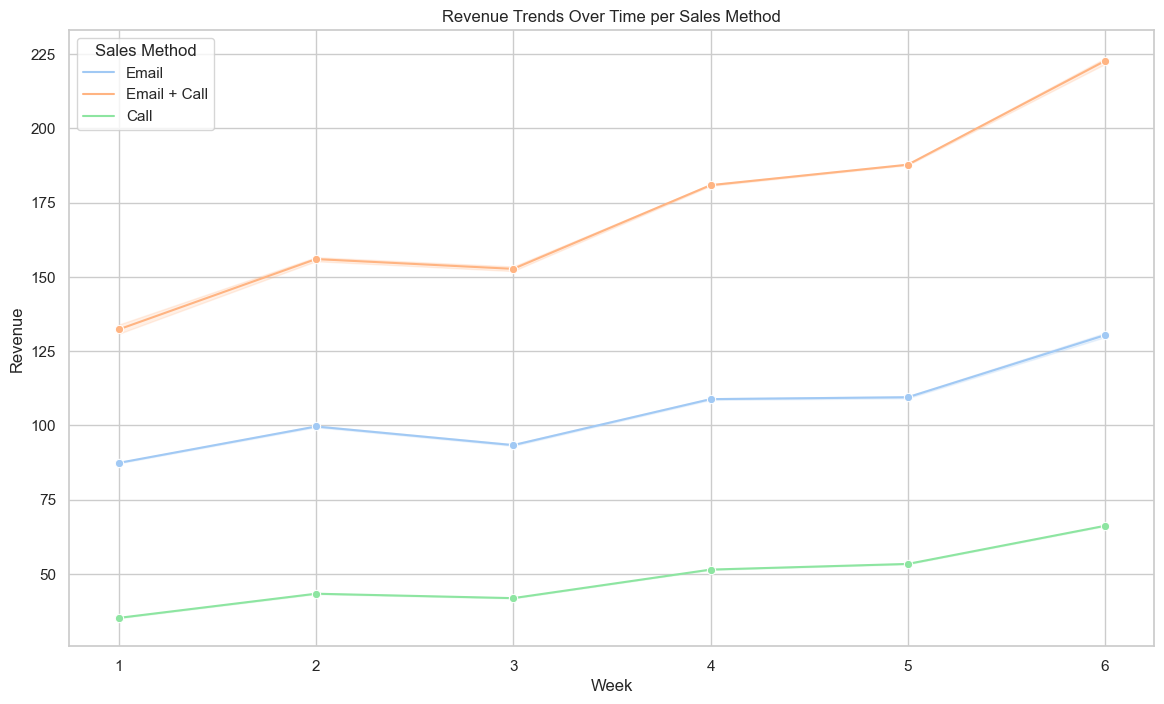

In [26]:
# Plotting the revenue trends over time (weeks) for each sales method
plt.figure(figsize=(14, 8))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=data, palette='pastel', marker='o')
plt.title('Revenue Trends Over Time per Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()


Average values over time slighty increase in all methods. 

Since we launched a new product this could be caused by increased trust, or ramp up demand for the new product.

In [27]:
# Grouping by week and sales_method and counting the number of sales
sales_per_week_and_method = data.groupby(['week', 'sales_method']).size().reset_index(name='number_of_sales')

# Displaying the result in a pivot table
sales_per_week_and_method_pivot = sales_per_week_and_method.pivot(index='week', columns='sales_method', values='number_of_sales').fillna(0)
sales_per_week_and_method_pivot

sales_method,Call,Email,Email + Call
week,,,
1,758,2815,148
2,805,1486,200
3,902,1150,359
4,1005,1075,495
5,1044,743,787
6,448,197,583


**The number of sales give deeper insights:**
* Last week sales are lower, maybe there is a cutoff-date when data was fetched from the system?
* Call has no significant pattern when it comes to number of sales
* Email starts high and slows down, since there is no personal interaction we need to perform a root-cause analysis in form of A/B - Website/Mail testing to keep customers interested.
* The additional mail in the third weeks does not seem to have a big inpact on sales made
* Hybrid approach ramps-up to the end. Given the chosen approach this shows, that email alone was not enough to convince the customers. In the later weeks, when the calls come in, sales ramp up.


## Customer Analysis

The following table shows the averages for each of the sales methods:

In [28]:
# Calculating the averages per sales method
average_metrics_per_method = data.groupby('sales_method').agg({
    'nb_sold': 'mean',
    'revenue': 'sum',
    'years_as_customer': 'mean',
    'nb_site_visits': 'mean'
}).reset_index()

# Calculating the Average Item Value by dividing total revenue by the number of items sold
average_metrics_per_method['Average Item Value'] = average_metrics_per_method['revenue'] / data.groupby('sales_method')['nb_sold'].sum().values

# Renaming the columns for displaying table in the report
average_metrics_per_method.rename(columns={
    'nb_sold': 'Average Number of Items',
    'years_as_customer': 'Average Customer Loyalty',
    'nb_site_visits': 'Average Site Visits'
}, inplace=True)

# Deselecting the revenue-sum column
average_metrics_per_method = average_metrics_per_method[['sales_method', 'Average Number of Items', 'Average Item Value', 'Average Customer Loyalty', 'Average Site Visits']]

average_metrics_per_method.round(2)


,sales_method,Average Number of Items,Average Item Value,Average Customer Loyalty,Average Site Visits
0,Call,9.51,5.01,5.18,24.42
1,Email,9.73,9.99,4.98,24.75
2,Email + Call,12.23,15.04,4.51,26.77


**Call Method:**
The "Call" method, while focusing on smaller transactions and fostering long-term relationships, shows a moderate level of site engagement. This might reflect a balanced approach to online and offline interactions.

**mail Method:**
The Email" method has a similar level of site engagement as the "Call" method but with higher item value and a broad reach of products. This may indicate effective online marketing strategies that complement email communications.

**Email + Call Method:**
The "Email + Call" method shows the highest average site visits, aligning with its focus on high-value transactions. This might suggest a more integrated approach, combining online engagement with personalized communication to force a call to action and leading to more high value items being sold. Also we can see significant changes in the number of items, which might be an indicator for successful upselling methods on the phone.

# Business Metrics

Since we already have a rate of 82.29% when it comes to sales including E-Mail, I would recommend to focus on leveraging the hybrid approach as much as possible. Since we are using highly-paid employees as a ressource, we need a KPI that can track the efficiency of the approach so we are not wasting money and increase our cost-of-sales. Also, since we might still use the **call-Method** on specific use cases, we want to make sure we are creating revenues out of it.

The metric we can track for this goal is the "revenue-per-call-minute". This metric will take both, **hybrid and call method**, into account and calculates the revenue per minute we are generating out of our calls.

In [29]:
# Assigning call times based on the sales_method
call_time_per_method = {'Call': 30, 'Email + Call': 10}

# We will use the source data with missing values, since we want to calculate the KPI exclusively on the source data
data_with_blanks=pd.read_csv('product_sales.csv')

# Data Cleaning the inskonsistent names
data_with_blanks['sales_method'] = data_with_blanks['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'})             
data_with_blanks['call_time'] = data_with_blanks['sales_method'].map(call_time_per_method).fillna(0)

# Calculating the total call time
total_call_time = data_with_blanks['call_time'].sum()

# Calculating the total revenue for calls (considering rows with the "Call" and "Email + Call" methods)
total_revenue_for_calls = data_with_blanks[data_with_blanks['sales_method'].isin(['Call', 'Email + Call'])]['revenue'].sum()

# Step 4: Calculating the KPI (Revenue per Minute Spent in Calls)
kpi_revenue_per_minute = total_revenue_for_calls / total_call_time

# Rounding the KPI to two decimal places
kpi_revenue_per_minute = round(kpi_revenue_per_minute, 2)
print(f"The revenue-per-call-minute is {kpi_revenue_per_minute} for the last 6 weeks.")

The revenue-per-call-minute is 3.64 for the last 6 weeks.


In [30]:
# Function to calculate the KPI for a specific week
def calculate_kpi_for_week(data, week_number):
    # Filtering data for the specific week
    week_data = data[data['week'] == week_number]
    
    # Calculating the total call time for the week
    total_call_time_week = week_data['call_time'].sum()

    # Calculating the total revenue for calls for the week
    total_revenue_for_calls_week = week_data[week_data['sales_method'].isin(['Call', 'Email + Call'])]['revenue'].sum()

    # Calculating the KPI (Revenue per Minute Spent in Calls) for the week
    kpi_revenue_per_minute_week = total_revenue_for_calls_week / total_call_time_week if total_call_time_week != 0 else 0

    # Rounding the KPI to two decimal places
    return round(kpi_revenue_per_minute_week, 2)

# Calculating the KPI for week 1 and week 2
kpi_week_1 = calculate_kpi_for_week(data_with_blanks, week_number=1)
kpi_week_6 = calculate_kpi_for_week(data_with_blanks, week_number=6)

kpi_week_1, kpi_week_6


(1.78, 7.23)

In [31]:
# Calculating the growth rate from week 1 to week 6
growth_rate_week_1_to_6 = ((kpi_week_6 - kpi_week_1) / kpi_week_1) * 100

# Rounding the growth rate to two decimal places
growth_rate_week_1_to_6 = round(growth_rate_week_1_to_6, 2)
growth_rate_week_1_to_6



# Calculating the average growth rate per week
average_growth_rate_per_week = growth_rate_week_1_to_6 / 5

# Rounding the average growth rate to two decimal places
average_growth_rate_per_week = round(average_growth_rate_per_week, 2)

print(f"The revenue-per-call-minute is {kpi_week_1} for week 1 and {kpi_week_6} for week 6, which shows an increase of {growth_rate_week_1_to_6}% over 6 weeks and a {average_growth_rate_per_week}% increase per week.")

The revenue-per-call-minute is 1.78 for week 1 and 7.23 for week 6, which shows an increase of 306.18% over 6 weeks and a 61.24% increase per week.


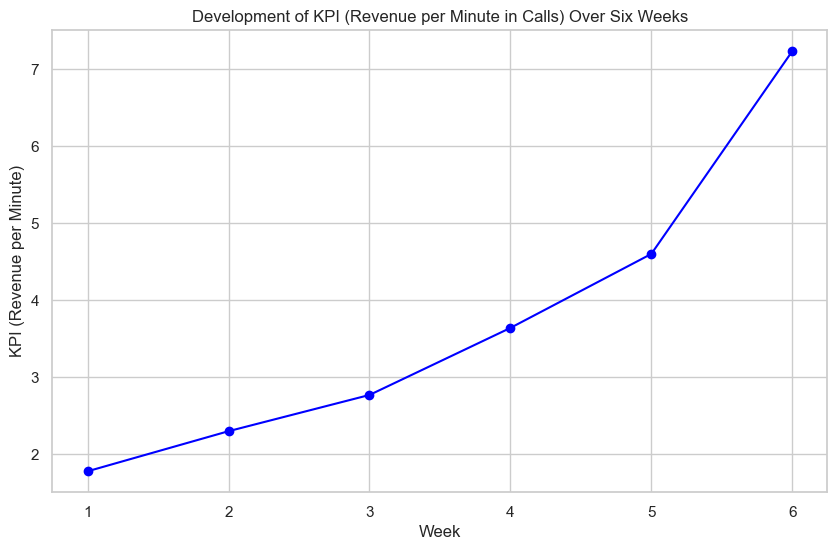

In [32]:
import matplotlib.pyplot as plt

# Calculating the KPI for each week from 1 to 6
kpi_weeks_1_to_6 = [calculate_kpi_for_week(data_with_blanks, week_number=week) for week in range(1, 7)]

# Weeks
weeks = range(1, 7)

# Plotting the development of the KPI over the six weeks
plt.figure(figsize=(10, 6))
plt.plot(weeks, kpi_weeks_1_to_6, marker='o', linestyle='-', color='blue')
plt.title('Development of KPI (Revenue per Minute in Calls) Over Six Weeks')
plt.xlabel('Week')
plt.ylabel('KPI (Revenue per Minute)')
plt.grid(True)
plt.xticks(weeks)
plt.show()


The KPI-development shown above validates the KPI as a suitable approach to measure sales_method effectiveness. All under the assumption, that we still chose the **E-Mail approach** on a broad range of products and customer segments. 

# Conclusion and Recommendations

**Continue with "Email" Method:** Given the high total revenue, moderate average item value, broad reach, and low effort (not quantified), the "Email" method appears to be highly effective and efficient. It should be used for a wide variety of products and customer segments. Email should be the backbone of our sales-strategy. Perform A/B-Tests to optimize performance.

**Leverage "Email + Call" for High-Value Sales:** With the highest average item value and reduced call time to 10 minutes, the "Email + Call" method can be strategically used for high-value sales, personalized interactions, and targeting specific customer segments. It should back up our Email approach to generate high value sales.

**Consider Efficiency for "Call" Method:** While the "Call" method has value in relationship-building and long-term customer retention, the high time requirement of up to 30 minutes may limit its efficiency. It may be best suited for specific scenarios where personalized interaction is essential.

**Measure and track cost-intensive methods:** Use the KPI provided to keep track of our high-cost sales_method approaches. While the hybrid-approach seems promising when it comes to upselling and high value transaction it also includes the risk of wasting time and ressources on calls, which generate no additional revenue.

**Get additional data for transactions, which didnt generate revenue:** Since our data provided is just showing customers who brought our new products the analysis might suffer from "suriver-bias". To further validate the findings and dive deeper into root-cause analysis it is necessary to also see non-responding measures.

**Check missing revenue values:** Perform an analysis of the missing values for revenue to see if data-processing in the source-system is working as inteded.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation